In [24]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
# Load the dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


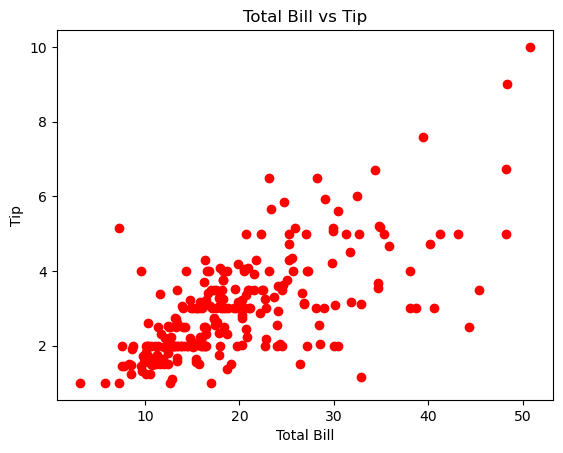

In [26]:
# 2. Understanding the dataset
df.info()

# 3. Stats Summary
df.describe()

# 4. Relatipnship Check
# Before using any model , we must confirm relationship

import matplotlib.pyplot as plt
plt.scatter(df["total_bill"], df["tip"], color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

In [27]:
# Observation :

# 1. As the bill increases, the tip also increases.
# 2. Relationship = Straight line (we can use linear regression)

# 4. Feature & Target Separation 
x = df[['total_bill']]  # Feature i/p 2d only (imp)
y = df['tip']  # Feature o/p 

# 5. Train Test Split
# A model must perform well on unseen data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)
# 80% --> Training
# 20% --> Testing

In [28]:
# 6. Feature Standardization

# i. Compare the Co-effiecients fairly
# ii. Avoid the Dominance of Large values
# iii. Prepare for Ridge/Lasso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Imp:
# i. Fit only on training data
# ii. Prevents the data leakage

In [29]:
# 7. Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print('Co-effiecients : ', model.coef_[0])
print('Intercept (c):', model.intercept_)

y_pred = model.predict(x_test_scaled)

Co-effiecients :  0.9357171400271828
Intercept (c): 3.0877948717948724


In [30]:
# 8. Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print('R2 score :', r2)

R2 score : 0.5449381659234664


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE :', mse)
print('RMSE :', rmse)

MSE : 0.5688142529229538
RMSE : 0.7541977545199626


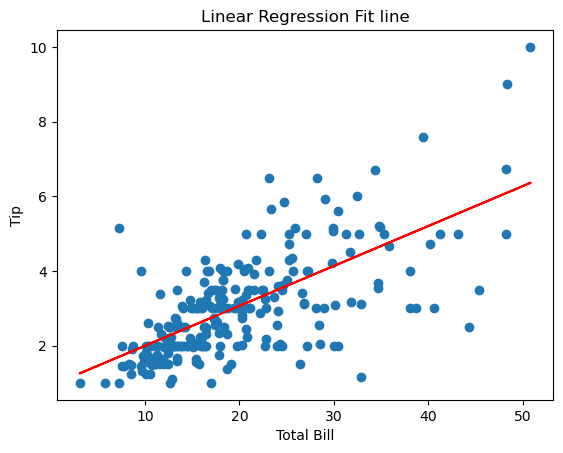

In [35]:
# 9. Visualize the Best fit Line

plt.scatter(x,y)
plt.plot(x, model.predict(scaler.transform(x)), color= 'red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression Fit line")
plt.show()

In [38]:
# 10 . Input - Output Real Time

# bill_amount  = float(input("Enter the bill amount:"))
# bill_scaled = scaler.transform([[bill_amount]])
# predict_tip = model.predict(bill_scaled)

# print(f"Predicted tip : ${predict_tip[0] :.2f}")

bill_amount = float(input("Enter the bill amount:"))
bill_df = pd.DataFrame([[bill_amount]], columns=["total_bill"])
bill_scaled = scaler.transform(bill_df)

predict_tip = model.predict(bill_scaled)

print(f"Predicted tip: ${predict_tip[0]:.2f}")


Predicted tip: $107.78
